In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import sys
models_path = os.path.abspath('../models')
sys.path.append(models_path)


import correlations


In [14]:
data_path = '/Users/marijazelic/ada-2024-project-adavengers/data/2004_per_age_region.csv'
path_winners = '/Users/marijazelic/ada-2024-project-adavengers/data/generated/party_winners_over_years.csv'

processed_data, age_winners = correlations.preprocess_data(data_path, path_winners, 2004)
states = processed_data.index

kmeans = KMeans(n_clusters=2, n_init="auto").fit(processed_data)

cluster_labels = kmeans.labels_
state_clusters = dict(zip(states, cluster_labels))
print(state_clusters)

{'New York': 0, 'California': 0, 'Connecticut': 0, 'New Hampshire': 0, 'Wisconsin': 0, 'Iowa': 0, 'Nevada': 0, 'Pennsylvania': 0, 'Virginia': 0, 'Ohio': 0, 'Florida': 0, 'North Carolina': 1, 'Arizona': 0, 'Montana': 0, 'Indiana': 0}


In [15]:
age_winners[['state', 'winner']]

,state,winner
0,New York,DEMOCRAT
1,California,DEMOCRAT
2,Connecticut,DEMOCRAT
3,New Hampshire,DEMOCRAT
4,Wisconsin,DEMOCRAT
5,Iowa,REPUBLICAN
6,Nevada,REPUBLICAN
7,Pennsylvania,DEMOCRAT
8,Virginia,REPUBLICAN
9,Ohio,REPUBLICAN


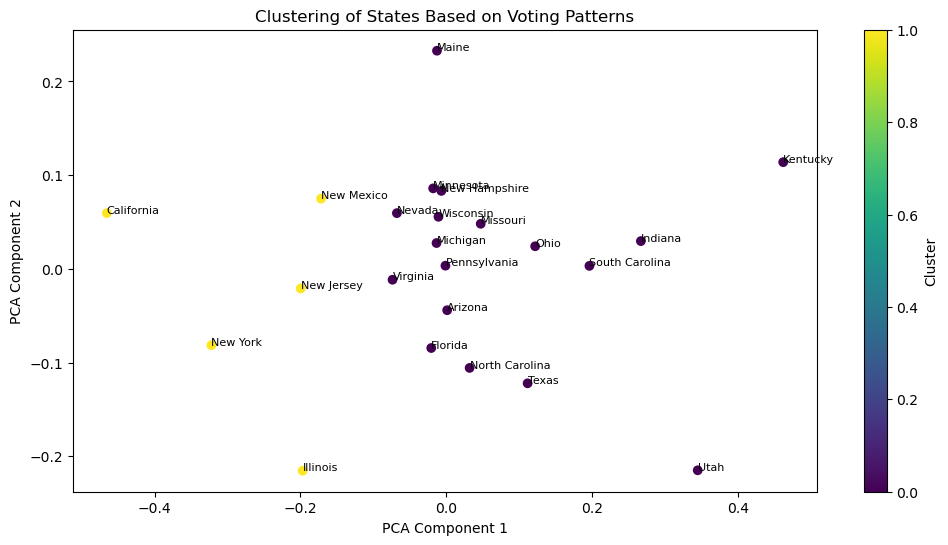

In [8]:
# We need to visualized states 
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(processed_data)

plt.figure(figsize=(12,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
for i, state in enumerate(states):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], state, fontsize=8)
plt.title("Clustering of States Based on Voting Patterns")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [5]:
# Visualizing the results we need to project in lower dimensional space

In [18]:
data_path = '/Users/marijazelic/ada-2024-project-adavengers/data/2016_per_age_region.csv'
age = pd.read_csv(data_path, delimiter=';')


winners = pd.read_csv(path_winners)

# Merge with winners 
party_winners = pd.read_csv(path_winners)
party_winners['state'] = party_winners['state'].str.title()
party_winners = party_winners[party_winners['year'] == 2016]

party_winners.head(5)

age_winners = pd.merge(age, party_winners[['state', 'winner']], how='inner', left_on='state', right_on='state')
age_winners.head()

,state,pop18_29_democrat,pop30_44_democrat,pop45_64_democrat,pop65_democrat,pop18_29_republican,pop30_44_republican,pop45_64_republican,pop65_republican,division,region,winner
0,Arizona,54.0,47,41,42,35.0,41,54,55,Mountain,West,REPUBLICAN
1,California,66.0,67,57,61,23.0,27,39,36,Pacific,West,DEMOCRAT
2,Florida,54.0,54,43,40,36.0,39,56,57,South Atlantic,South,REPUBLICAN
3,Illinois,67.0,59,53,35,28.0,33,43,61,East North Central,Midwest,DEMOCRAT
4,Indiana,46.0,37,34,39,46.0,57,63,58,East North Central,Midwest,REPUBLICAN


In [74]:
same

,State_1,State_2,Corr,Winner_1,Winner_2
0,Illinois,New York,0.998801,DEMOCRAT,DEMOCRAT
1,South Carolina,Utah,0.995855,REPUBLICAN,REPUBLICAN
2,New Jersey,New York,0.992763,DEMOCRAT,DEMOCRAT
3,Illinois,New Jersey,0.990820,DEMOCRAT,DEMOCRAT
4,Nevada,New Hampshire,0.990414,DEMOCRAT,DEMOCRAT
...,...,...,...,...,...
97,Indiana,Wisconsin,0.049879,REPUBLICAN,REPUBLICAN
98,Florida,Indiana,0.046670,REPUBLICAN,REPUBLICAN
99,Maine,New Hampshire,0.041179,DEMOCRAT,DEMOCRAT
100,Missouri,Ohio,0.038107,REPUBLICAN,REPUBLICAN


In [75]:
different

,State_1,State_2,Corr,Winner_1,Winner_2
0,Minnesota,Wisconsin,0.996957,DEMOCRAT,REPUBLICAN
1,Florida,Nevada,0.992673,REPUBLICAN,DEMOCRAT
2,Arizona,New Hampshire,0.988546,REPUBLICAN,DEMOCRAT
3,Florida,New Hampshire,0.981781,REPUBLICAN,DEMOCRAT
4,Arizona,Nevada,0.971895,REPUBLICAN,DEMOCRAT
...,...,...,...,...,...
87,Indiana,New Hampshire,0.144945,REPUBLICAN,DEMOCRAT
88,Maine,South Carolina,0.137839,DEMOCRAT,REPUBLICAN
89,California,Missouri,0.117754,DEMOCRAT,REPUBLICAN
90,Maine,Utah,0.069425,DEMOCRAT,REPUBLICAN


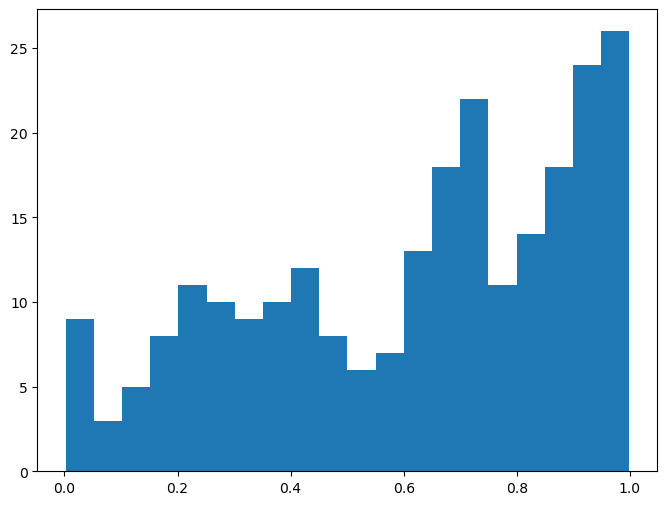

In [44]:
plt.figure(figsize=(8,6))
plt.hist(positive_correlations_sorted['Corr'], bins=20)
plt.show()

In [14]:
age_range_ohe_drop

,pop18_29_democrat,pop30_44_democrat,pop45_64_democrat,pop18_29_republican,pop30_44_republican,pop45_64_republican
state,,,,,,
Arizona,0.606742,0.534091,0.431579,0.393258,0.465909,0.568421
California,0.741573,0.712766,0.593750,0.258427,0.287234,0.406250
Colorado,0.581395,0.505495,0.521277,0.418605,0.494505,0.478723
Florida,0.600000,0.580645,0.434343,0.400000,0.419355,0.565657
Georgia,0.656250,0.536842,0.418367,0.343750,0.463158,0.581633
Illinois,0.705263,0.641304,0.552083,0.294737,0.358696,0.447917
Indiana,0.500000,0.393617,0.350515,0.500000,0.606383,0.649485
Iowa,0.466667,0.422222,0.447917,0.533333,0.577778,0.552083
Kentucky,0.365591,0.305263,0.343750,0.634409,0.694737,0.656250


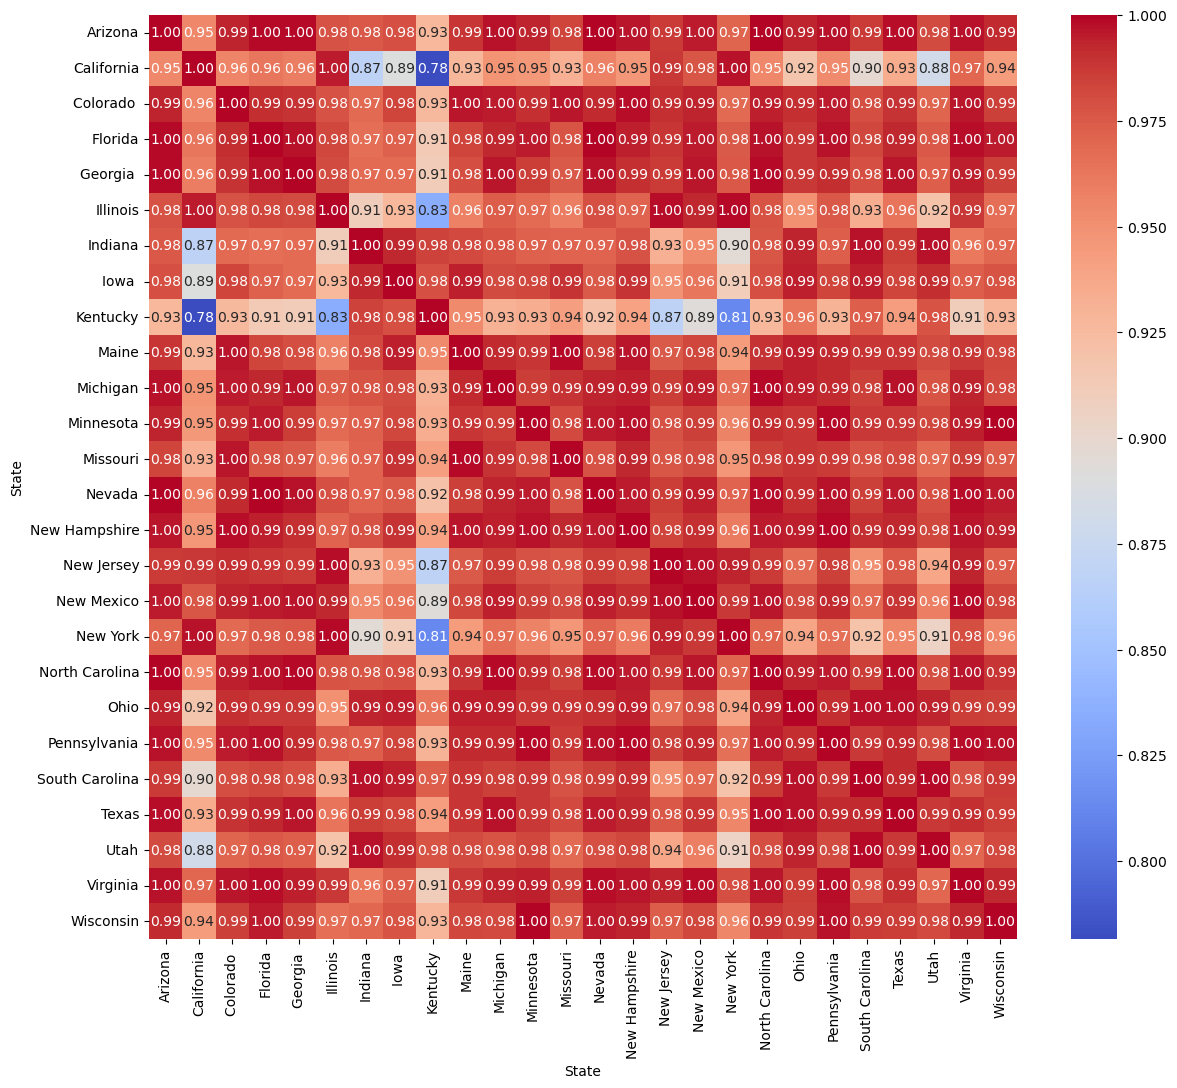

In [16]:
cos_sim = cosine_similarity(age_range_ohe_drop)
similarity_df = pd.DataFrame(cos_sim, index=age_range_ohe_drop.index, columns=age_range_ohe_drop.index)

plt.figure(figsize=(14,12))
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xlabel('State')
plt.ylabel('State')
plt.show()

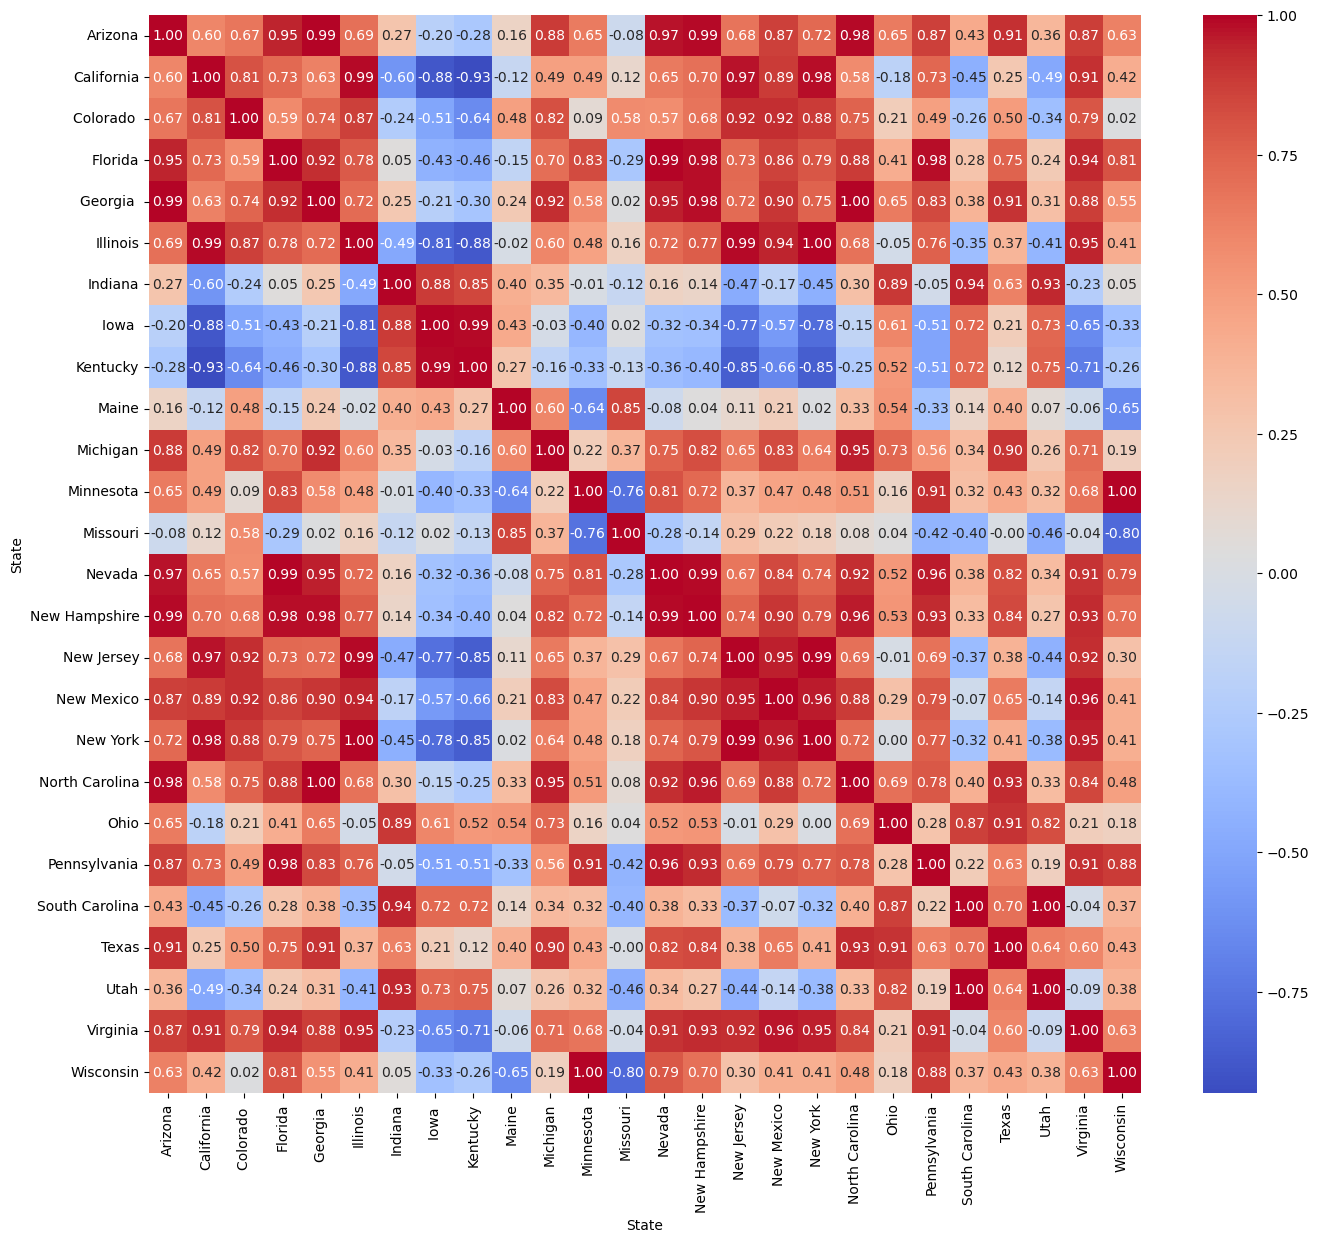

In [18]:


plt.figure(figsize=(16,14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xlabel('State')
plt.ylabel('State')
plt.show()

In [19]:
correlation_matrix

state,Arizona,California,Colorado,Florida,Georgia,Illinois,Indiana,Iowa,Kentucky,Maine,...,New Mexico,New York,North Carolina,Ohio,Pennsylvania,South Carolina,Texas,Utah,Virginia,Wisconsin
state,,,,,,,,,,,,,,,,,,,,,
Arizona,1.000000,0.604834,0.670318,0.945837,0.994690,0.693015,0.274038,-0.202825,-0.276538,0.160606,...,0.869208,0.721921,0.984923,0.651064,0.871125,0.427545,0.911446,0.364990,0.874194,0.628865
California,0.604834,1.000000,0.807517,0.726874,0.628169,0.990344,-0.595758,-0.884993,-0.931423,-0.122341,...,0.885572,0.982377,0.584438,-0.177538,0.731823,-0.446172,0.248178,-0.493548,0.911357,0.416097
Colorado,0.670318,0.807517,1.000000,0.590759,0.736539,0.866205,-0.243398,-0.507166,-0.641453,0.483909,...,0.919960,0.882099,0.746824,0.208951,0.486426,-0.260515,0.503742,-0.343882,0.790339,0.022075
Florida,0.945837,0.726874,0.590759,1.000000,0.921978,0.776009,0.046670,-0.431527,-0.461677,-0.148097,...,0.857773,0.791087,0.883993,0.411907,0.982711,0.280296,0.747476,0.235719,0.938522,0.805354
Georgia,0.994690,0.628169,0.736539,0.921978,1.000000,0.720320,0.250684,-0.213584,-0.301969,0.242845,...,0.899200,0.750273,0.996008,0.647820,0.834357,0.377822,0.909130,0.308864,0.878722,0.551445
Illinois,0.693015,0.990344,0.866205,0.776009,0.720320,1.000000,-0.488509,-0.812177,-0.876109,-0.017509,...,0.941063,0.998801,0.684938,-0.045371,0.757893,-0.351865,0.370007,-0.408538,0.945331,0.411596
Indiana,0.274038,-0.595758,-0.243398,0.046670,0.250684,-0.488509,1.000000,0.880923,0.847167,0.404680,...,-0.173331,-0.447643,0.301116,0.889847,-0.050220,0.944540,0.629732,0.932187,-0.227079,0.049879
Iowa,-0.202825,-0.884993,-0.507166,-0.431527,-0.213584,-0.812177,0.880923,1.000000,0.985435,0.426661,...,-0.567467,-0.782650,-0.150662,0.605809,-0.509262,0.722442,0.211685,0.733183,-0.651731,-0.330547
Kentucky,-0.276538,-0.931423,-0.641453,-0.461677,-0.301969,-0.876109,0.847167,0.985435,1.000000,0.269581,...,-0.663483,-0.852220,-0.249770,0.521336,-0.509697,0.721356,0.121337,0.746751,-0.706462,-0.257530
